In [1]:
%xmode Verbose
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import LineString
from tqdm.notebook import tqdm
tqdm.pandas()

import TRACLUS_JSON_Prep as tjp

import os
pickle_path = 'Variables/'

if not os.path.exists(pickle_path):
    os.makedirs(pickle_path)

Exception reporting mode: Verbose


/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
path_pollen_file = 'Data/resultsfile_pollen.csv'
path_no_pollen_file = 'Data/resultsfile_no_pollen.csv'

data_pollen = pd.read_csv(path_pollen_file, index_col='path_id', parse_dates=['first_timestamp', 'last_timestamp'])
data_no_pollen = pd.read_csv(path_no_pollen_file, index_col='path_id', parse_dates=['first_timestamp', 'last_timestamp'])

In [3]:
data_no_pollen.head()

,positions,first_timestamp,last_timestamp,first_snippet_link,last_snippet_link
path_id,,,,,
252107318,"{""(12813,10472)"",""(13249,10937)"",""(13752,11580...",2019-05-12 08:28:53,2019-05-12 08:28:53,gs://eurofins-study-05-2018/24_6/2019-05-12T08...,gs://eurofins-study-05-2018/24_6/2019-05-12T08...
252212481,"{""(11408,101240)"",""(11339,100731)"",""(11133,990...",2019-05-12 08:47:45,2019-05-12 08:47:45,gs://eurofins-study-05-2018/24_12/2019-05-12T0...,gs://eurofins-study-05-2018/24_12/2019-05-12T0...
252215191,"{""(13850,104441)"",""(13850,104441)"",""(13850,104...",2019-05-12 08:47:45,2019-05-12 08:47:45,gs://eurofins-study-05-2018/24_12/2019-05-12T0...,gs://eurofins-study-05-2018/24_12/2019-05-12T0...
252214249,"{""(13435,105192)"",""(13586,104709)"",""(13993,103...",2019-05-12 08:47:45,2019-05-12 08:47:45,gs://eurofins-study-05-2018/24_12/2019-05-12T0...,gs://eurofins-study-05-2018/24_12/2019-05-12T0...
252215566,"{""(126544,104227)"",""(126424,103669)"",""(126516,...",2019-05-12 08:47:45,2019-05-12 08:47:45,gs://eurofins-study-05-2018/24_12/2019-05-12T0...,gs://eurofins-study-05-2018/24_12/2019-05-12T0...


In [4]:
print("Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

data_pollen.dropna(inplace=True)
data_no_pollen.dropna(inplace=True)

print("++dropna++ Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

Length Pollen: 100854 | Length NO Pollen: 1000000
++dropna++ Length Pollen: 100853 | Length NO Pollen: 1000000


In [5]:
print("Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

data_pollen.drop_duplicates(subset=['positions'], inplace=True)
data_no_pollen.drop_duplicates(subset=['positions'], inplace=True)

print("++drop_duplicate++ Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

Length Pollen: 100853 | Length NO Pollen: 1000000
++drop_duplicate++ Length Pollen: 100852 | Length NO Pollen: 676766


In [6]:
print("Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

# Remove data_pollen from data_no_pollen
data_no_pollen.drop(labels=data_pollen.index, inplace=True)

print("++drop++ Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

Length Pollen: 100852 | Length NO Pollen: 676766
++drop++ Length Pollen: 100852 | Length NO Pollen: 575914


In [7]:
data_pollen.to_pickle(pickle_path + 'data_pollen.pkl')
data_no_pollen.to_pickle(pickle_path + 'data_no_pollen.pkl')


In [8]:
def position_str_to_list(row: pd.Series):
    row['positions'] = row['positions'].replace('{', '').replace('}', '').replace('\"', '')
    row['positions'] = LineString(eval(row['positions']))
    return row

In [9]:
tmp_data_pollen = data_pollen.progress_apply(position_str_to_list, axis='columns')

In [10]:
geo_data_pollen = gpd.GeoDataFrame({'timestamp': tmp_data_pollen['first_timestamp']},
                                   geometry=tmp_data_pollen['positions'],
                                   index=data_pollen.index)
geo_data_pollen.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"LINESTRING (12813.000 10472.000, 13249.000 109..."
252212481,2019-05-12 08:47:45,"LINESTRING (11408.000 101240.000, 11339.000 10..."
252215191,2019-05-12 08:47:45,"LINESTRING (13850.000 104441.000, 13850.000 10..."
252214249,2019-05-12 08:47:45,"LINESTRING (13435.000 105192.000, 13586.000 10..."
252215566,2019-05-12 08:47:45,"LINESTRING (126544.000 104227.000, 126424.000 ..."


In [11]:
tmp_data_no_pollen = data_no_pollen.progress_apply(position_str_to_list, axis='columns')

In [12]:
geo_data_no_pollen = gpd.GeoDataFrame({'timestamp': tmp_data_no_pollen['first_timestamp']},
                                      geometry=tmp_data_no_pollen['positions'],
                                      index=data_no_pollen.index)

geo_data_no_pollen.head()

,timestamp,geometry
path_id,,
256566320,2019-05-15 11:06:39,"LINESTRING (82995.000 105192.000, 85242.000 10..."
256611902,2019-05-15 11:06:39,"LINESTRING (49459.000 104951.000, 49317.000 10..."
256611953,2019-05-15 11:06:39,"LINESTRING (34664.000 103883.000, 35115.000 10..."
256612000,2019-05-15 11:06:39,"LINESTRING (134426.000 103905.000, 134426.000 ..."
256612023,2019-05-15 11:06:39,"LINESTRING (81576.000 12573.000, 81280.000 145..."


In [13]:
geo_data_pollen.to_pickle(pickle_path + 'geo_data_pollen.pkl')
geo_data_no_pollen.to_pickle(pickle_path + 'geo_data_no_pollen.pkl')

<AxesSubplot:ylabel='Probability'>

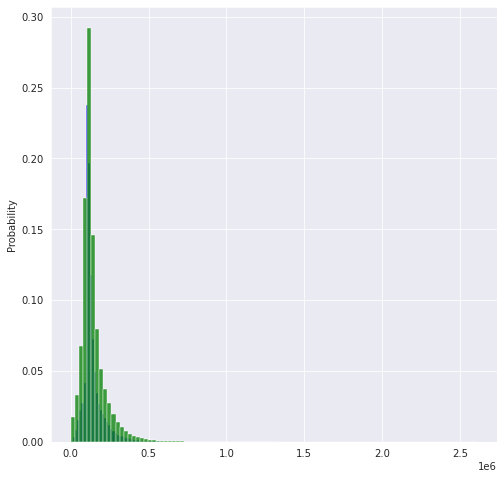

In [4]:
plt.figure(figsize=(8, 8))

# So that the background is white
#sns.set_style('white')
sns.set_style('darkgrid')

sns.histplot(data=geo_data_pollen.length, stat='probability', color='blue', bins=100)
sns.histplot(data=geo_data_no_pollen.length, stat='probability', color='green', bins=100)

#sns.histplot(data=geo_data_pollen.length, stat='probability', color='blue', binwidth=3)
#sns.histplot(data=geo_data_no_pollen.length, stat='probability', color='green', binwidth=3)

In [15]:
print('geo_data_pollen.shape: ', geo_data_pollen.shape,
      ' geo_data_no_pollen.shape: ', geo_data_no_pollen.shape)

geo_data_pollen.shape:  (100852, 2)  geo_data_no_pollen.shape:  (575914, 2)


In [16]:
geo_data_pollen.length.describe()

count    1.008520e+05
mean     1.367963e+05
std      6.753415e+04
min      1.400527e+03
25%      1.026137e+05
50%      1.166057e+05
75%      1.488942e+05
max      1.331922e+06
dtype: float64

In [17]:
geo_data_no_pollen.length.describe()

count    5.759140e+05
mean     1.429178e+05
std      8.426176e+04
min      0.000000e+00
25%      1.014759e+05
50%      1.211838e+05
75%      1.623049e+05
max      2.608381e+06
dtype: float64

In [18]:
geo_data_pollen_length_by_day = geo_data_pollen.groupby(geo_data_pollen['timestamp'].dt.date)
geo_data_pollen_length_by_day.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"LINESTRING (12813.000 10472.000, 13249.000 109..."
252212481,2019-05-12 08:47:45,"LINESTRING (11408.000 101240.000, 11339.000 10..."
252215191,2019-05-12 08:47:45,"LINESTRING (13850.000 104441.000, 13850.000 10..."
252214249,2019-05-12 08:47:45,"LINESTRING (13435.000 105192.000, 13586.000 10..."
252215566,2019-05-12 08:47:45,"LINESTRING (126544.000 104227.000, 126424.000 ..."
254549097,2019-05-13 06:20:23,"LINESTRING (10535.000 12277.000, 10857.000 127..."
254549094,2019-05-13 06:20:23,"LINESTRING (12063.000 12063.000, 12325.000 125..."
254549793,2019-05-13 06:20:23,"LINESTRING (11661.000 102082.000, 11580.000 10..."
253333948,2019-05-13 06:41:42,"LINESTRING (118150.000 101885.000, 119186.000 ..."


In [19]:
geo_data_pollen_length_by_day.count()

,timestamp,geometry
timestamp,,
2019-05-12,25041,25041
2019-05-13,39587,39587
2019-05-14,27520,27520
2019-05-15,8704,8704


In [20]:
geo_data_no_pollen_length_by_day = geo_data_no_pollen.groupby(geo_data_no_pollen['timestamp'].dt.date)
geo_data_no_pollen_length_by_day.head()

,timestamp,geometry
path_id,,
256566320,2019-05-15 11:06:39,"LINESTRING (82995.000 105192.000, 85242.000 10..."
256611902,2019-05-15 11:06:39,"LINESTRING (49459.000 104951.000, 49317.000 10..."
256611953,2019-05-15 11:06:39,"LINESTRING (34664.000 103883.000, 35115.000 10..."
256612000,2019-05-15 11:06:39,"LINESTRING (134426.000 103905.000, 134426.000 ..."
256612023,2019-05-15 11:06:39,"LINESTRING (81576.000 12573.000, 81280.000 145..."
...,...,...
487840329,2019-07-18 00:04:45,"LINESTRING (23912.000 103783.000, 23912.000 10..."
486344170,2019-07-18 00:16:30,"LINESTRING (3484.000 75757.000, 3484.000 75757..."
486344178,2019-07-18 00:16:30,"LINESTRING (3484.000 75757.000, 3492.000 75987..."


In [21]:
geo_data_no_pollen_length_by_day.count()

,timestamp,geometry
timestamp,,
2019-05-15,14319,14319
2019-05-16,28063,28063
2019-05-17,23151,23151
2019-05-18,20050,20050
2019-05-19,24014,24014
2019-05-20,4796,4796
2019-05-21,8,8
2019-05-22,19088,19088
2019-05-23,18491,18491


In [22]:
geo_data_pollen.length.groupby(geo_data_pollen['timestamp'].dt.date).describe()

,count,mean,std,min,25%,50%,75%,max
timestamp,,,,,,,,
2019-05-12,25041.0,134926.607746,65263.254171,1400.526595,102898.915318,116187.533081,146576.339419,1.331922e+06
2019-05-13,39587.0,139372.850302,71155.522112,2891.515001,102391.646639,117904.649301,154005.942735,9.379701e+05
2019-05-14,27520.0,136634.499687,67251.368485,2735.068935,102681.464619,116304.192448,147153.160408,1.240653e+06
2019-05-15,8704.0,130968.430249,56496.220263,4012.128465,102416.489592,113932.285003,140267.216645,8.818719e+05


In [23]:
geo_data_no_pollen.length.groupby(geo_data_no_pollen['timestamp'].dt.date).mean()

timestamp
2019-05-15    138316.919233
2019-05-16    144582.048256
2019-05-17    147708.708468
2019-05-18    145720.423614
2019-05-19    139878.366507
2019-05-20    138046.260223
2019-05-21    127361.744909
2019-05-22    138162.167592
2019-05-23    144140.114072
2019-05-24    142933.788216
2019-05-25    143341.285714
2019-05-26    139530.563029
2019-05-27    141151.026073
2019-05-28    135560.256570
2019-05-29    140806.598169
2019-05-30    145014.090847
2019-05-31    139323.098415
2019-06-01    153542.423637
2019-06-02    152719.027892
2019-06-03    154400.281791
2019-06-04    146086.357285
2019-06-05    143837.715756
2019-06-06    130239.843226
2019-06-07    146736.336014
2019-06-08    132065.556037
2019-06-09    144847.451485
2019-06-10    141295.458197
2019-06-11    144822.734367
2019-06-12    134063.203276
2019-06-13    135045.228818
2019-06-14     79206.129745
2019-06-15    115568.003329
2019-06-16     72947.883318
2019-06-17     75248.417559
2019-06-27     50784.663088
2019-06-28

In [24]:
len(geo_data_no_pollen_length_by_day)

56

In [25]:
length = geo_data_pollen.groupby(geo_data_pollen['timestamp'].dt.date)#.agg(lambda x: x['timestamp'].dt.date)
length.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"LINESTRING (12813.000 10472.000, 13249.000 109..."
252212481,2019-05-12 08:47:45,"LINESTRING (11408.000 101240.000, 11339.000 10..."
252215191,2019-05-12 08:47:45,"LINESTRING (13850.000 104441.000, 13850.000 10..."
252214249,2019-05-12 08:47:45,"LINESTRING (13435.000 105192.000, 13586.000 10..."
252215566,2019-05-12 08:47:45,"LINESTRING (126544.000 104227.000, 126424.000 ..."
254549097,2019-05-13 06:20:23,"LINESTRING (10535.000 12277.000, 10857.000 127..."
254549094,2019-05-13 06:20:23,"LINESTRING (12063.000 12063.000, 12325.000 125..."
254549793,2019-05-13 06:20:23,"LINESTRING (11661.000 102082.000, 11580.000 10..."
253333948,2019-05-13 06:41:42,"LINESTRING (118150.000 101885.000, 119186.000 ..."


In [2]:
data_pollen = pd.read_pickle(pickle_path + 'data_pollen.pkl')
data_no_pollen = pd.read_pickle(pickle_path + 'data_no_pollen.pkl')
geo_data_pollen = pd.read_pickle(pickle_path + 'geo_data_pollen.pkl')
geo_data_no_pollen = pd.read_pickle(pickle_path + 'geo_data_no_pollen.pkl')

In [13]:
sampel_linestrings = geo_data_pollen.iloc[0:5]

sampel_linestrings.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"LINESTRING (12813.000 10472.000, 13249.000 109..."
252212481,2019-05-12 08:47:45,"LINESTRING (11408.000 101240.000, 11339.000 10..."
252215191,2019-05-12 08:47:45,"LINESTRING (13850.000 104441.000, 13850.000 10..."
252214249,2019-05-12 08:47:45,"LINESTRING (13435.000 105192.000, 13586.000 10..."
252215566,2019-05-12 08:47:45,"LINESTRING (126544.000 104227.000, 126424.000 ..."


In [3]:
traclus_input_json = tjp.create_json(sampel_linestrings)

tjp.write_to_file(traclus_input_json)

NameError: name 'create_json' is not defined